In [1]:
import pandas as pd

In [2]:
portfolio = pd.read_parquet("../_data/portfolio_return.parquet")

he_table = pd.read_parquet("../_data/actual_cds_return.parquet")

In [4]:
from create_portfolio import pivot_table

In [13]:
from misc_tools import month_code_to_date

In [16]:
portfolio_pivot = pivot_table(portfolio)
portfolio_pivot = portfolio_pivot.reset_index()
portfolio_pivot["yyyymm"] = portfolio_pivot["yyyymm"].apply(month_code_to_date)
portfolio_pivot = portfolio_pivot.set_index("yyyymm")

In [17]:
he_table["yyyymm"] = he_table["yyyymm"].apply(month_code_to_date)
he_table = he_table.set_index("yyyymm")

In [18]:
import matplotlib.pyplot as plt
def plot_cds_comparison(df_actual, df_replication, column_name):
    """
    Plots the comparison of actual vs. replicated values for a given CDS column.

    Parameters:
    df_actual (DataFrame): DataFrame containing actual CDS values.
    df_replication (DataFrame): DataFrame containing replicated CDS values.
    column_name (str): The column name (CDS series) to plot.
    """
    if column_name not in df_actual.columns or column_name not in df_replication.columns:
        print(f"Column {column_name} not found in DataFrames.")
        return
    
    plt.figure(figsize=(10, 5))
    plt.plot(df_actual.index, df_actual[column_name], label="Actual", linestyle='-', marker='o')
    plt.plot(df_replication.index, df_replication[column_name], label="Replication", linestyle='--', marker='x')
    
    plt.title(f"Comparison of {column_name}: Actual vs. Replication")
    plt.xlabel("Time (yyyymm)")
    plt.ylabel("CDS Spread")
    plt.legend()
    plt.grid(True)
    plt.show()

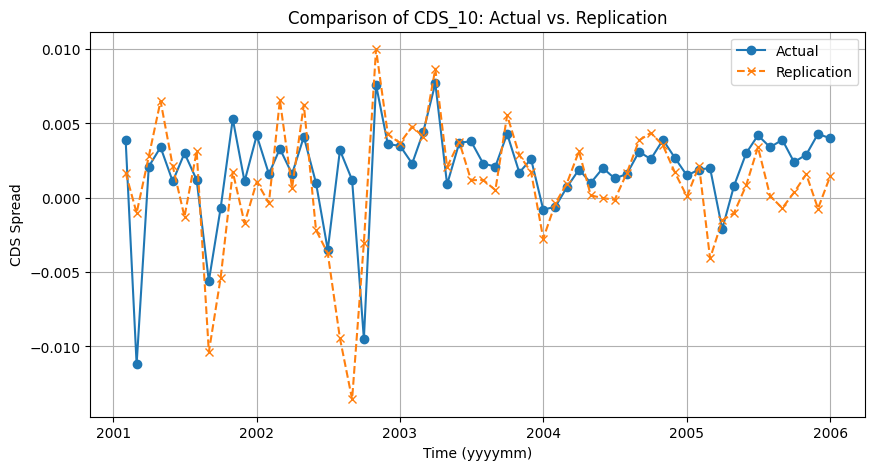

In [20]:
plot_cds_comparison(he_table.iloc[0:60], portfolio_pivot[1:61], "CDS_10")

In [23]:
he_table.iloc[0:60].corrwith(portfolio_pivot[1:61])

CDS_01    0.167340
CDS_02    0.288728
CDS_03    0.502816
CDS_04    0.598596
CDS_05    0.592808
CDS_06    0.648251
CDS_07    0.385618
CDS_08    0.501327
CDS_09    0.756423
CDS_10    0.522727
CDS_11    0.444350
CDS_12    0.723201
CDS_13    0.726084
CDS_14    0.691206
CDS_15    0.694600
CDS_16    0.405405
CDS_17    0.825362
CDS_18    0.795635
CDS_19    0.465593
CDS_20    0.573678
dtype: float64

In [27]:
portfolio_pivot = portfolio_pivot[1:61]
he_table = he_table.iloc[0:60]

In [28]:
# 计算 replication 和原始数据的 monthly return 平均值
avg_replication = portfolio_pivot.mean(axis=1)  # 计算每个月所有 portfolio 的均值
avg_original = he_table.mean(axis=1)

# 计算两者的相关性
correlation_avg = avg_replication.corr(avg_original)
print(f"Correlation between avg monthly return: {correlation_avg:.4f}")


Correlation between avg monthly return: 0.8649


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from settings import config
from create_portfolio import load_portfolio, pivot_table
from pull_cds_return_data import load_real_cds_return
from misc_tools import month_code_to_date
portfolio = load_portfolio()
portfolio_pivot = pivot_table(portfolio)
portfolio_pivot = portfolio_pivot.reset_index()
portfolio_pivot["yyyymm"] = portfolio_pivot["yyyymm"].apply(month_code_to_date)
portfolio_pivot = portfolio_pivot.set_index("yyyymm")


In [6]:
he_table = load_real_cds_return()
he_table

,CDS_01,CDS_02,CDS_03,CDS_04,CDS_05,CDS_06,CDS_07,CDS_08,CDS_09,CDS_10,CDS_11,CDS_12,CDS_13,CDS_14,CDS_15,CDS_16,CDS_17,CDS_18,CDS_19,CDS_20
yyyymm,,,,,,,,,,,,,,,,,,,,
2001-02-01,0.0039,0.0040,0.0033,0.0024,0.0093,0.0030,0.0020,0.0048,0.0044,0.0039,0.0078,-0.0036,0.0042,0.0057,0.0027,-0.0153,-0.0032,0.0070,0.0005,0.0193
2001-03-01,0.0012,0.0041,0.0061,0.0045,0.0073,0.0059,0.0079,0.0071,0.0087,-0.0112,0.0060,0.0042,0.0032,0.0068,-0.0012,0.0093,0.0083,-0.0012,0.0072,0.0219
2001-04-01,0.0033,0.0044,0.0044,0.0060,0.0054,0.0037,0.0044,0.0044,0.0068,0.0021,0.0098,0.0106,0.0084,0.0098,0.0083,0.0124,0.0061,0.0109,0.0041,-0.0018
2001-05-01,0.0038,0.0043,0.0045,0.0039,0.0044,0.0039,0.0040,0.0075,0.0045,0.0034,0.0076,0.0078,0.0049,0.0117,0.0108,0.0061,0.0150,0.0152,0.0184,0.0140
2001-06-01,0.0030,0.0027,0.0044,0.0037,0.0079,0.0042,0.0053,0.0035,0.0040,0.0011,0.0031,0.0029,0.0038,0.0045,0.0034,0.0044,0.0020,0.0073,0.0065,-0.0007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-01,0.0005,0.0009,0.0013,0.0011,0.0022,0.0022,0.0024,0.0017,0.0015,0.0026,0.0031,0.0015,0.0035,0.0032,0.0043,0.0062,0.0084,0.0060,0.0051,0.0152
2012-09-01,0.0012,0.0010,0.0020,0.0022,0.0030,0.0023,0.0030,0.0033,0.0039,0.0045,0.0049,0.0059,0.0057,0.0087,0.0070,0.0083,0.0092,0.0120,0.0119,0.0174
2012-10-01,0.0010,0.0009,0.0009,0.0016,0.0018,0.0019,0.0014,0.0010,0.0019,0.0010,0.0008,0.0028,0.0043,0.0042,0.0013,0.0045,0.0033,0.0028,-0.0010,0.0045


In [4]:
he_table = load_real_cds_return()
he_table["yyyymm"] = he_table["yyyymm"].apply(month_code_to_date)
he_table = he_table.set_index("yyyymm")

KeyError: 'yyyymm'

In [29]:
equal_weighted_return = portfolio_pivot.mean(axis=1)

# Value-Weighted Portfolio (基于CDS spread作为权重)
weights = he_table.abs()  # 这里假设原始 CDS 数据的绝对值可以作为权重
weighted_return = (portfolio_pivot * weights).sum(axis=1) / weights.sum(axis=1)

# 计算相关性
corr_equal = equal_weighted_return.corr(he_table.mean(axis=1))
corr_weighted = weighted_return.corr(he_table.mean(axis=1))

print(f"Correlation (Equal-Weighted Portfolio): {corr_equal:.4f}")
print(f"Correlation (Value-Weighted Portfolio): {corr_weighted:.4f}")

Correlation (Equal-Weighted Portfolio): 0.8649
Correlation (Value-Weighted Portfolio): 0.7720


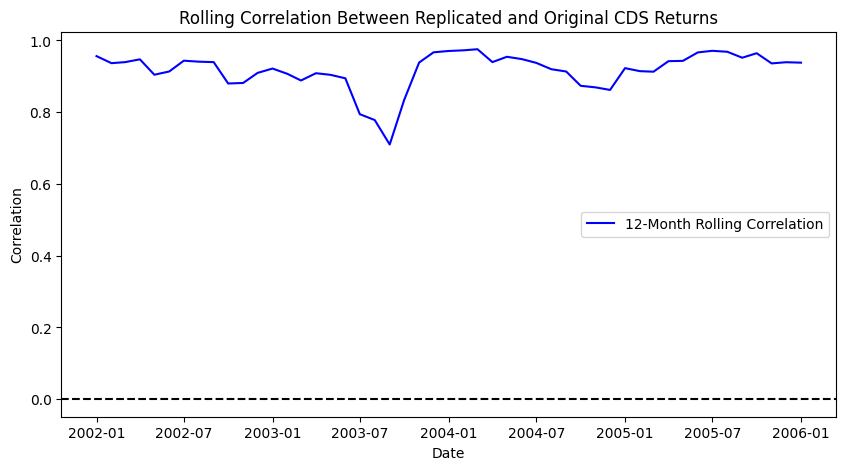

In [30]:
import matplotlib.pyplot as plt

rolling_corr = avg_replication.rolling(window=12).corr(avg_original)  # 12个月滚动相关性

plt.figure(figsize=(10, 5))
plt.plot(rolling_corr, label="12-Month Rolling Correlation", color="blue")
plt.axhline(0, linestyle="--", color="black")
plt.title("Rolling Correlation Between Replicated and Original CDS Returns")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()
